Fitness:0.6070410498249744, index:0
Fitness:0.15007607512772003, index:1
Fitness:0.3196763996423528, index:2
Fitness:0.4088557366312868, index:3
Fitness:0.284940239539577, index:4
Fitness:0.431651325747635, index:5
Fitness:0.238633298782825, index:6
Fitness:0.349101081016773, index:7
Fitness:0.2502500517911354, index:8
Fitness:0.3083143663191984, index:9
Fitness:0.39377027952747756, index:1
Fitness:0.5406803749685221, index:2
Fitness:0.3692165500903366, index:3
Fitness:0.5063166967672069, index:4
Fitness:0.40275827815597576, index:5
Fitness:0.5524997017873462, index:6
Fitness:0.3909045551719409, index:7
Fitness:0.5548868889177822, index:8
Fitness:0.4559565951488391, index:9
Fitness:0.5950909959993224, index:1
Fitness:0.4879473985832077, index:2
Fitness:0.5721833262101328, index:3
Fitness:0.475783963343582, index:4
Fitness:0.32713368611803423, index:5
Fitness:0.609216434289387, index:6
Fitness:0.6287693281206856, index:8
Fitness:0.7990290398820604, index:9
Fitness:0.43563624735717976, i

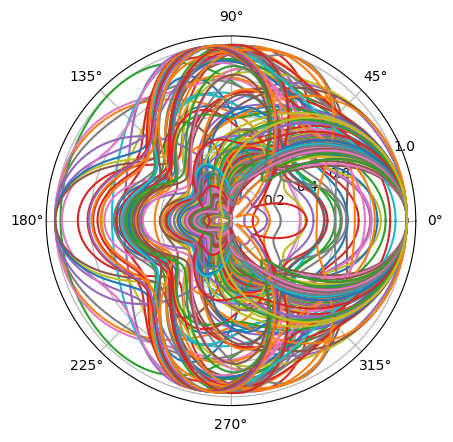

In [224]:
import pygad 
import numpy as np 
from scipy import linalg 
from solver_for_Pocklington_equation import directional_pattern
import matplotlib.pyplot as plt

light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12
frequency = 1e6 * 146
omega = 2 * np.pi * frequency
incident_voltage = 10

delta_z = light_speed / frequency / 3e2

P = []

def aim_func(phi):
    f = np.zeros(len(phi))
    for i in range (len(f)):
        f[i] = max(0,np.sin(np.pi/2 - phi[i]))**7
    return f

def fitness_func(ga_instance, solution, solution_idx):

    element_position = np.zeros((num_elements, 3)) 
    element_length = np.zeros(num_elements)           
    for i in range(num_elements):
        element_position[i] = [0, solution[i], 0] 
        element_length[i] = solution[num_elements + i]     
    wire_radius = np.full(num_elements, 3.175e-3)
    source_position = np.array([element_position[0]], dtype=float) 
    
    for i in range(len(element_position)-1):
        for j in range(i+1,len(element_position)): 
            if(abs(element_position[i][1] - element_position[j][1]) <= max(wire_radius[i],wire_radius[j])):
                print(f'Fitness:{0}, index:{solution_idx}')
                return 0
    P_total, phi = directional_pattern(frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)[7:9]
    fitness = np.dot(aim_func(phi), P_total/np.max(P_total)) / np.linalg.norm(aim_func(phi)) / np.linalg.norm(P_total/np.max(P_total))
    plt.polar(phi, P_total/np.max(P_total))
    print(f'Fitness:{fitness}, index:{solution_idx}')
    P.append(P_total)
    return fitness

num_elements = 8

num_generations = 100
num_parents_mating = 2
sol_per_pop = 10  
num_genes = 2 * num_elements  

min_pos, max_pos = 0.0, 1 * light_speed / frequency
min_length, max_length = light_speed / frequency * 0.4, light_speed / frequency * 0.6 
position_limit = [min_pos, max_pos]  
length_limit = [min_length, max_length]  

gene_space = []

for _ in range(num_elements):
    gene_space.append(position_limit)
for _ in range(num_elements):
    gene_space.append(length_limit)
    
# Создаем начальную популяцию с ограничениями на значения параметров
initial_population = np.random.uniform(low=[g[0] for g in gene_space], high=[g[1] for g in gene_space], size=(sol_per_pop, num_genes))
def mutation_func(offspring, ga_instance):
    
    for chromosome_idx in range(offspring.shape[0]):
        
        chance_of_mutation = np.random.uniform(-1,1)
        fitness_values = ga_instance.last_generation_fitness 
        fitness_value = fitness_values[chromosome_idx]

        if fitness_value >= 0.95:
            for gene_idx in range(offspring.shape[1]):
                chance_of_mutation = np.random.uniform(-1,1)
                if chance_of_mutation >= 0.75 :
                    if gene_idx < num_elements:
                        mutation_value = np.random.uniform(-max_pos/750, max_pos/750) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_pos, max_pos)
                    else :
                        mutation_value = np.random.uniform(-max_length/750, max_length/750) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_length, max_length)
        
        elif fitness_value >= 0.85:
            for gene_idx in range(offspring.shape[1]):
                chance_of_mutation = np.random.uniform(-1,1)
                if chance_of_mutation >= 0.75 :
                    if gene_idx < num_elements:
                        mutation_value = np.random.uniform(-max_pos/500, max_pos/500) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_pos, max_pos)
                    else :
                        mutation_value = np.random.uniform(-max_length/500, max_length/500) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_length, max_length)
                                           
        elif fitness_value >= 0.75:
            for gene_idx in range(offspring.shape[1]):
                chance_of_mutation = np.random.uniform(-1,1)
                if chance_of_mutation >= 0.75 :
                    if gene_idx < num_elements:
                        mutation_value = np.random.uniform(-max_pos/250, max_pos/250) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_pos, max_pos)
                    else :
                        mutation_value = np.random.uniform(-max_length/250, max_length/250) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_length, max_length)
                        
        elif fitness_value < 0.75:
            for gene_idx in range(offspring.shape[1]):
                chance_of_mutation = np.random.uniform(-1,1)
                if chance_of_mutation >= 0.75 :
                    if gene_idx < num_elements:
                        mutation_value = np.random.uniform(-max_pos/2, max_pos/2) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_pos, max_pos)
                    else :
                        mutation_value = np.random.uniform(-max_length/2, max_length/2) 
                        offspring[chromosome_idx, gene_idx] += mutation_value
                        offspring[chromosome_idx, gene_idx] = np.clip(offspring[chromosome_idx, gene_idx], min_length, max_length)
                        
    return offspring

# Создаем объект GA (генетического алгоритма)
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population=initial_population,
                       gene_space=gene_space,
                       mutation_type=mutation_func,
                       parent_selection_type='tournament',
                       crossover_type='single_point')  # Устанавливаем ограничения на гены

# Запускаем алгоритм
ga_instance.run()

# Получаем лучшее решение и его оценку после завершения работы алгоритма
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Лучшее решение:", solution)  # Выводим лучшее найденное решение
print("Оценка лучшего решения:", solution_fitness)  # Выводим оценку (fitness) лучшего решения

[0.84648186 1.11892097 1.16672345 1.03315633 1.09844878 0.93716849
 1.22922731 1.03825954] [[0.         1.35967915 0.        ]
 [0.         1.03827923 0.        ]
 [0.         1.48250595 0.        ]
 [0.         0.01295832 0.        ]
 [0.         0.93671919 0.        ]
 [0.         1.79942779 0.        ]
 [0.         1.46076654 0.        ]
 [0.         1.06378157 0.        ]] [0.003175 0.003175 0.003175 0.003175 0.003175 0.003175 0.003175 0.003175]


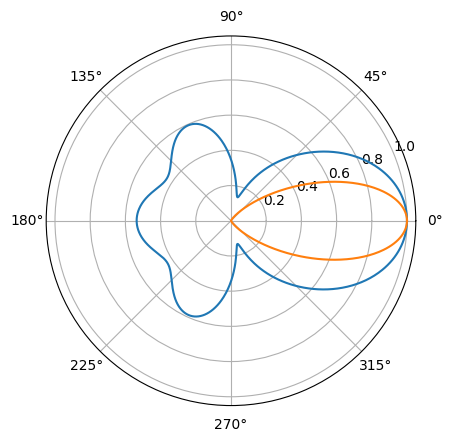

In [225]:
delta_z = light_speed / frequency / 5e2

element_position = np.zeros((num_elements, 3)) 
element_length = np.zeros(num_elements)           
for i in range(num_elements):
    element_position[i] = [0, solution[i], 0] 
    element_length[i] = solution[num_elements + i]     
wire_radius = np.full(num_elements, 3.175e-3)
source_position = np.array([element_position[0]], dtype=float) 
R, R_block, element_num, incident_field, impedance, current, current_block, P_total, phi = directional_pattern (frequency, delta_z, incident_voltage, element_position, element_length, wire_radius, source_position)
fitness = np.dot(aim_func(phi), P_total) / np.linalg.norm(aim_func(phi)) / np.linalg.norm(P_total)
plt.polar(phi, P_total/np.max(P_total))
plt.polar(phi,aim_func(phi))
print(element_length, element_position, wire_radius)

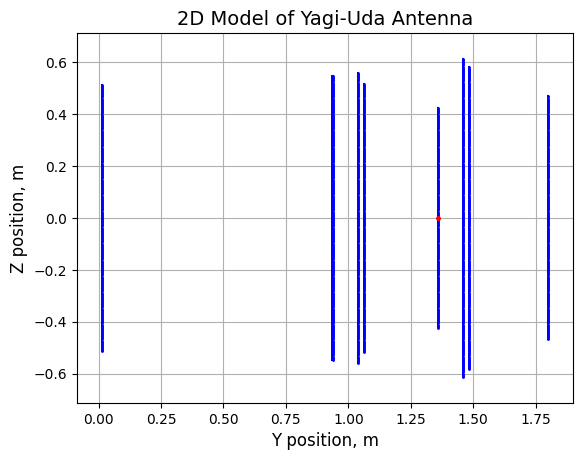

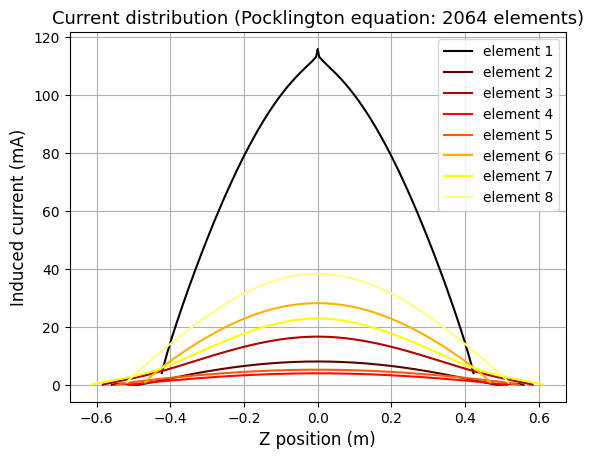

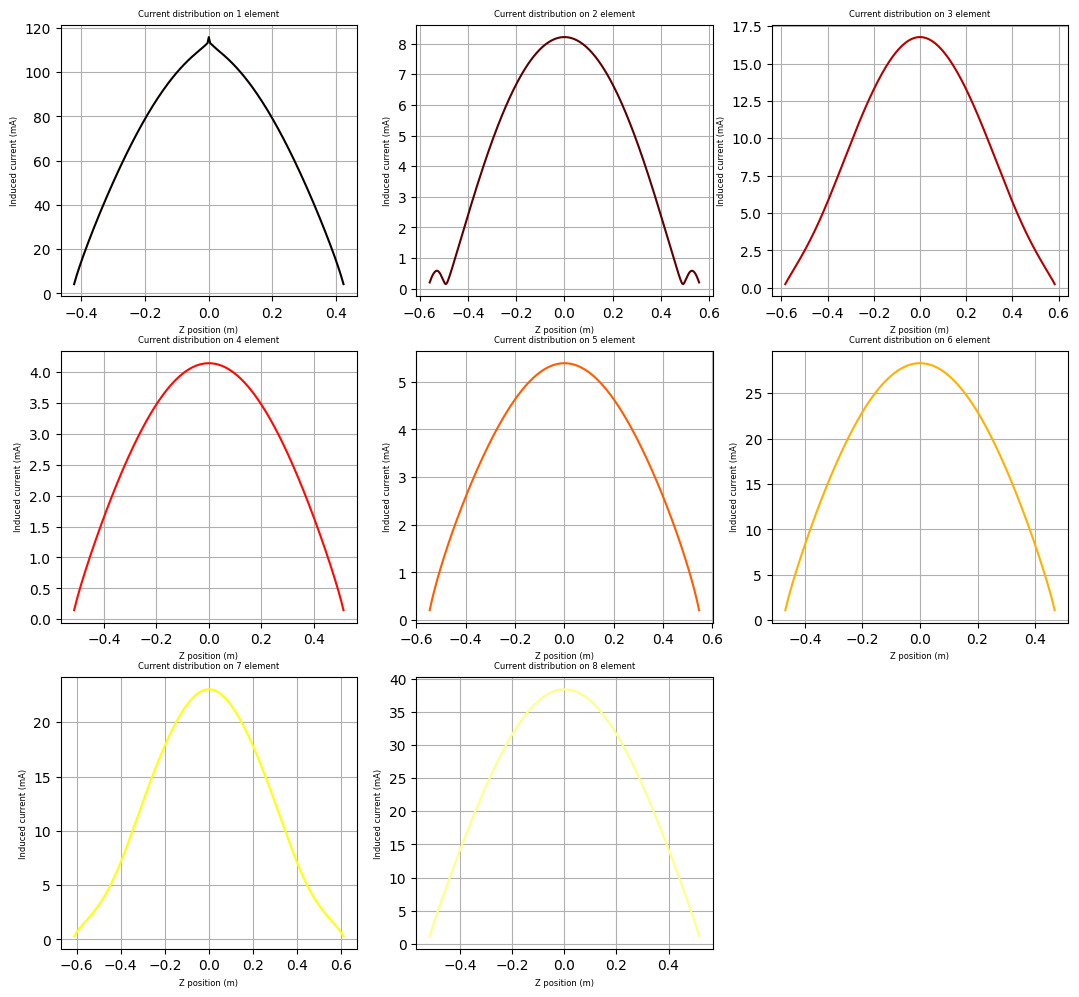

In [226]:
from visualization import plot_2dmodel, plot_together, plot_separately, current_distribution_2d, current_distribution_3d

plot_2dmodel(R, source_position, sum(element_num), delta_z)
plot_together(R_block, current_block)
plot_separately(R_block, current_block)
current_distribution_2d(R, current)
current_distribution_3d(R, source_position, R_block, current_block)

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

num_frames = len(P)

frames = []

for i in range(num_frames):
    plt.figure(figsize=(6, 6))
    
    plt.polar(phi, P[i])  
    plt.title(f"Frame {i + 1}")
    
    plt.savefig('temp_frame.png')
    plt.close()  
    
    frames.append(imageio.imread('temp_frame.png'))

imageio.mimsave('polar_animation.gif', frames, duration=1.5)  



C:\Users\lukas\AppData\Local\Temp\ipykernel_9816\1423061824.py:18: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.

